# Galileo - Chain Pool Eval

### Imports

In [1]:
import os
import matplotlib.pyplot as plt

from src.constants import Constant as c
from src.chain_poll import ChainPollEval

/Users/neel/Library/Caches/pypoetry/virtualenvs/src-mZjtLG-j-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Run Eval

In [ ]:
api_key = c.OPENAI_API_KEY
model = "gpt-4o"
cp = ChainPollEval(api_key=api_key, model=model)
cp.load_data(path="../data/wandb-extract-raw.csv", samples=20)
cp.run_eval()

In [3]:
cp.save_records(save_dir="../data/runs")

### Generate Eval Report

In [7]:
df = ChainPollEval.get_report(path="../data/runs")

In [8]:
df

,record_no,doc_type,question,response,score,cp_score,ragas_score
0,1,single,Why is Tom described as very naughty?,Tom is described as very naughty because he sc...,True,1,1.000000
1,2,multi,why does adaptation occur,Adaptation occurs as a result of natural selec...,True,1,1.000000
2,3,multi,how long is gestation in bearded dragons,The gestation period for bearded dragons lasts...,True,1,1.000000
3,4,single,Who was the home team?,The Falcons were the home team.,True,1,1.000000
4,5,multi,Who created the manga series originally serial...,"Taeko Ikeda created the manga series ""Tonde Bu...",True,1,1.000000
5,6,single,How many total passes did Andrew Luck throw?,Andrew Luck threw 39 passes in total during th...,True,1,1.000000
6,7,single,Which group is larger for the county according...,There are more people than households in the c...,True,1,1.000000
7,8,multi,BMW X5 is a mid-size version that was produced...,The BMW X5 (E53) was produced alongside the ne...,True,0,0.000000
8,9,multi,Frank Blake's longtime protégé was also the ch...,Campbell Soup Company. Denise Morrison succeed...,False,1,0.666667
9,10,single,How is Trudy critically injured?,Trudy is critically injured when Tubbs fails t...,True,1,1.000000


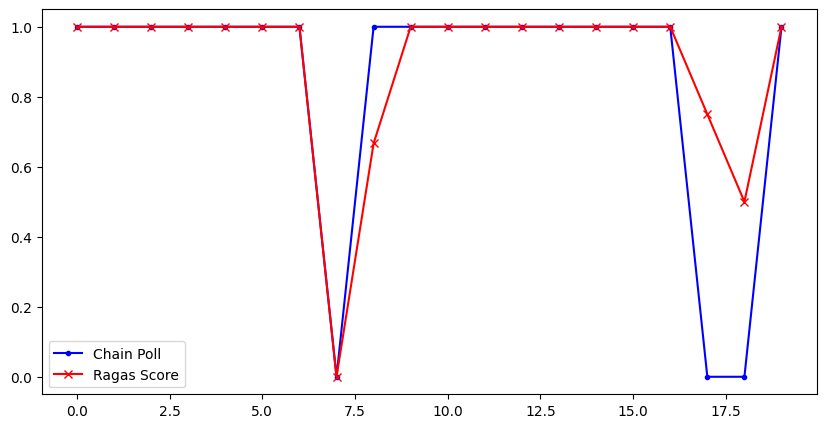

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(range(df.shape[0]), df["cp_score"], marker=".", label="Chain Poll", color="blue")
ax.plot(range(df.shape[0]), df["ragas_score"], marker="x", label="Ragas Score", color="red")

ax.legend()
plt.show()